# ClusterAl 2020


# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521


## "Establecimientos Hospitalarios en Provincia de Buenos Aires"

#### Docente: Martin Palazzo

#### Mentor: Ezequiel Vannucchi

####  Grupo N°9
#### JULIÁN BOGLIO

Buenos Aires tiene 134 Municipios divididos en 12 Regiones Sanitarias, zonas en que se divide el territorio bonaerense tomando en cuenta su población y las instalaciones médicas y sanitarias disponibles. 

La Región Sanitaria Nº 1 comprende a: Carmen de Patagones, Adolfo Alsina, González Chávez, Bahía Blanca, Coronel Dorrego, Coronel Pringles, Coronel Rosales, Coronel Suárez, Guaminí, Monte Hermoso, Puan, Saavedra, Torquinst, Tres Arroyos y Villarino; aproximadamente funcionan 195 centros de salud.

La Nº 2 está conformada por: Carlos Tejedor, Pehuajó, Daireaux, General Villegas, 9 de Julio, Carlos Casares, Trenque Lauquen, Rivadavia, Pellegrini, Tres Lomas, Saliquelo, e Hipólito Irigoyen; tiene aproximadamente 111 Centros.

A la Región Sanitaria Nº 3 la componen los municipios de:General Viamonte, Chacabuco, Junín, General Arenales, Leandro N. Alem, General Pinto, F. Ameghino y Lincoln; aquí están en funcionamiento 85 Centros de Salud aproximadamente.

Por su parte: Capitán Sarmiento, Carmen de Areco, San Andrés de Giles, San Antonio de Areco, Baradero, San Pedro, Ramallo, San Nicolás, Arrecifes, Salto, Pergamino, Colón, Rojas forman la Región Sanitaria Nº 4, en donde hay 111 centros de Salud.

En la Región Nº 5 hay 356 Centros en funcionamiento distribuidos en las siguientes localidades: Exaltación de la Cruz, Zárate, Campana, Pilar, Escobar, Tigre, José C. Paz, Malvinas Argentinas, San Fernando, San Isidro, Vicente López, Gral. San Martín, San Miguel e Isla Martín García.

La sexta es una de las más extensas porque enmarca a dos municipios del primer cordón del Conurbano Bonaerense de la Zona Sur que limitan con la Capital Federal Avellaneda y Lanús, y a siete del segundo cordón del Conurbano: Almirante Brown, Berazategui, Esteban Echeverría, Ezeiza, Florencio Varela, Lomas de Zamora y Quilmes. En total suma una población estimada de 3.650.198 personas.

La Región 7 incluye a Moreno, Hurlingham, Morón, Ituzaingo, Tres de Febrero, Merlo, General Las Heras, Gral. Rodríguez, Marcos Paz y Luján; cuenta con 160 centros de salud.

La Región Sanitaria Nº 8 comprende los municipios de: General Lavalle, Maipú, Partido de La Costa, Pinamar, Villa Gesell, General Madariaga, General Guido, Ayacucho, Tandil, Balcarce, Mar Chiquita, General Pueyrredón, General Alvarado, Loberia, Necochea, San Cayetano; tiene 190 centros.

La novena incluye a: Las Flores, General Alvear, Tapalqué, Bolívar, Azul, Benito Juárez, Laprida, Olavarría, Lamadrid y Rauch; brinda atención médica a través de sus 111 centros de Salud.

La Región Sanitaria Nº 10 abarca a:Mercedes, Lobos, Suipacha, Bragado, Alberti, Chivilcoy, Navarro, Roque, Pérez, 25 de Mayo y Saladillo; posee 106 centros.

Pilar, Dolores, Tordillo, Castelli, General Belgrano, Chascomús, Punta Indio, Monte, General Paz, Brandsen, Berisso, La Plata, Ensenada, San Vicente, Cañuelas, Presidente Perón y Magdalena, componen a la Región Sanitaria Nº 11 que cuenta con 184 centros.

Por último la Nº 12 comprende al Partido de La Matanza y cuenta con aproximadamente 78 centros de salud.

<img src="REGION-SANITARIA.JPG" style="width: 1000px;"/>

Lo primero que haremos será importar librerías a utilizar durante el proyecto y luego cargar el data set:

In [98]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets, preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV

In [62]:
#Importar dataset
hospitalarios = pd.read_excel('rendimientos-hospitalarios.xlsx')

### MACHINE LEARNING

Comenzaremos acondicionando el dataframe para trabajar con variables numéricas.

Mediante Análisis de los Componentes Principales (PCA) se reducirá la dimensinalidad del dataframe para obtener componentes que expliquen de la manera más correcta el comportamiento de las variables.

In [23]:
data = hospitalarios[(hospitalarios["consultas_medicas"] > 0)]

In [24]:
data.shape

(1218, 20)

In [25]:
data.drop(columns=['interconsultas','establecimiento'])

,anio,region_sanitaria,municipio_id,municipio_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,dias_estadia,promedio_dias_estadia,defunciones,tasa_mortalidad_hospitalaria
4,2009,I,60007.0,Adolfo Alsina,Municipal,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2009,I,60007.0,Adolfo Alsina,Municipal,0.0,1933.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2009,I,60007.0,Adolfo Alsina,Municipal,0.0,2087.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2009,I,60007.0,Adolfo Alsina,Municipal,0.0,2225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2009,I,60007.0,Adolfo Alsina,Municipal,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29800,2018,XII,60427.0,La Matanza,Municipal,0.0,10528.0,1578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29801,2018,XII,60427.0,La Matanza,Municipal,0.0,7482.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29802,2018,XII,60427.0,La Matanza,Municipal,0.0,15746.0,1069.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29803,2018,XII,60427.0,La Matanza,Municipal,0.0,23042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data["dependencia"] = data["dependencia"].map({"Municipal": 1, "Provincial": 2, "Nacional": 3})

In [27]:
data["region_sanitaria"] = data["region_sanitaria"].map({"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5, "VI": 6, "VII": 7, "VIII": 8, "IX": 9, "X": 10, "XI": 11, "XII": 12})

In [28]:
data

,anio,region_sanitaria,municipio_id,municipio_nombre,dependencia,establecimiento,consultas_odontologicas,consultas_medicas,consultas_paramedicas,interconsultas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,dias_estadia,promedio_dias_estadia,defunciones,tasa_mortalidad_hospitalaria
4,2009,1,60007.0,Adolfo Alsina,1,Unidad Sanitaria San Miguel Arcangel,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2009,1,60007.0,Adolfo Alsina,1,Unidad Sanitaria Colonia Lapin,0.0,1933.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2009,1,60007.0,Adolfo Alsina,1,Unidad Sanitaria Dr. J.C. Senepart,0.0,2087.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2009,1,60007.0,Adolfo Alsina,1,Unidad Sanitaria Murature,0.0,2225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2009,1,60007.0,Adolfo Alsina,1,Unidad Sanitaria Barrio Arturo Illia,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29800,2018,12,60427.0,La Matanza,1,Unidad Sanitaria El Torero,0.0,10528.0,1578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29801,2018,12,60427.0,La Matanza,1,Unidad Sanitaria Villegas,0.0,7482.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29802,2018,12,60427.0,La Matanza,1,Sala Dr. Miqueleiz (Independencia),0.0,15746.0,1069.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29803,2018,12,60427.0,La Matanza,1,Emergencias Sanitarias,0.0,23042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se realiza feature engineering para generar dummies:

In [29]:
data_dum_municipio = pd.get_dummies(data['municipio_nombre'])
data_drop = data.drop(columns=['municipio_nombre', 'municipio_id', 'anio', 'interconsultas', 'establecimiento'])
data_dummies = pd.concat([data_drop,data_dum_municipio], axis=1)
data_dummies

,region_sanitaria,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,...,Tapalqué,Tigre,Tordillo,Tornquist,Trenque Lauquen,Tres Arroyos,Tres Lomas,Vicente López,Villarino,Zárate
4,1,1,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0.0,1933.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0.0,2087.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0.0,2225.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29800,12,1,0.0,10528.0,1578.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29801,12,1,0.0,7482.0,491.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29802,12,1,0.0,15746.0,1069.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29803,12,1,0.0,23042.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print(data_dummies.shape)
data_clean_no_missings = data_dummies.dropna()
print(data_clean_no_missings.shape)

x = data_clean_no_missings.drop(columns=["dependencia"])

y = data_clean_no_missings['dependencia']
print(y.shape)

x.head()

(1218, 108)
(1218, 108)
(1218,)


,region_sanitaria,consultas_odontologicas,consultas_medicas,consultas_paramedicas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,...,Tapalqué,Tigre,Tordillo,Tornquist,Trenque Lauquen,Tres Arroyos,Tres Lomas,Vicente López,Villarino,Zárate
4,1,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.0,1933.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.0,2087.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1,0.0,2225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
x_for_pca = x
scaler = MinMaxScaler().fit(x_for_pca)
x_for_pca_scal = scaler.transform(x_for_pca)
n_comps = 20
pca = PCA(n_components= n_comps)
xpca = pd.DataFrame(pca.fit_transform(x_for_pca_scal))
eigenvalues = pca.explained_variance_ratio_

In [88]:
x_for_pca.head()

,region_sanitaria,consultas_odontologicas,consultas_medicas,consultas_paramedicas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,...,Tapalqué,Tigre,Tordillo,Tornquist,Trenque Lauquen,Tres Arroyos,Tres Lomas,Vicente López,Villarino,Zárate
4,1,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.0,1933.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.0,2087.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1,0.0,2225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


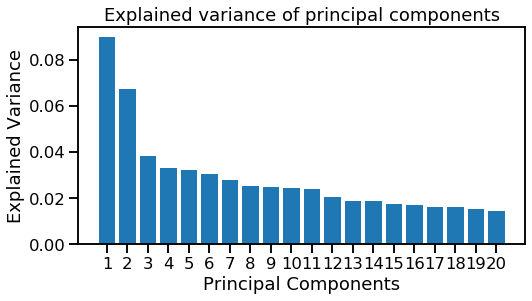

In [89]:
components = range(1,n_comps + 1)
plt.figure(figsize=(8,4))
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of principal components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

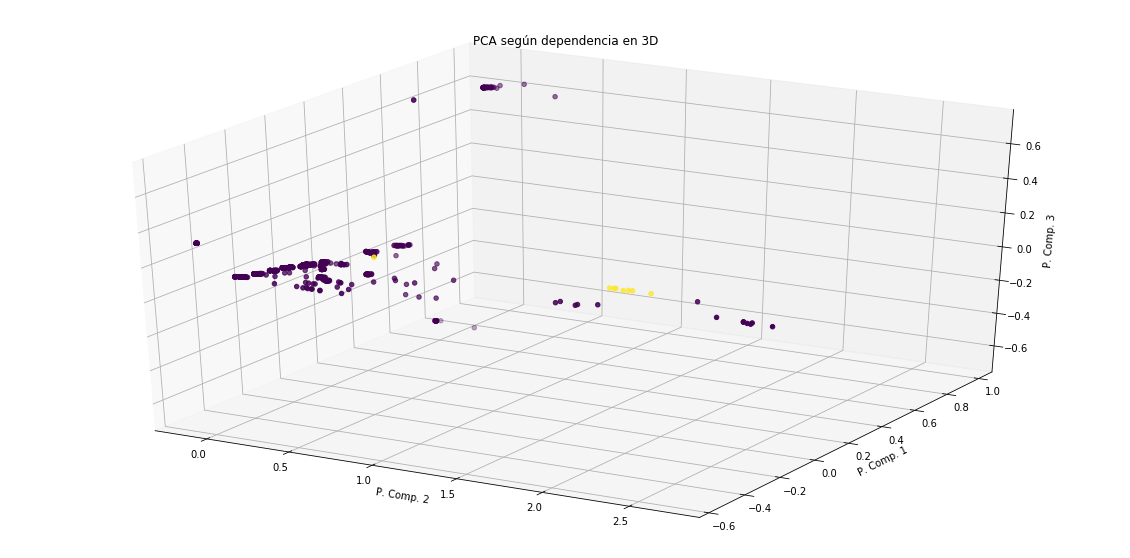

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y)
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA según dependencia en 3D')
plt.show()

Al no obtener una buena visualización en 3 dimensiones, decidimos hacerlo en 2 dimensiones:

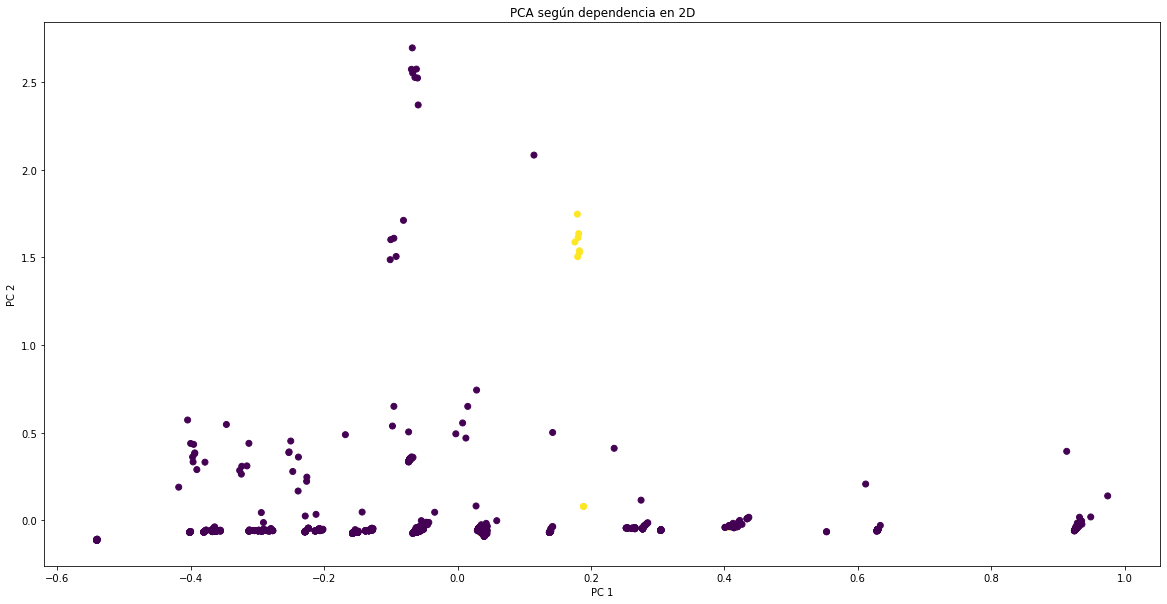

In [51]:
fig = plt.figure(figsize=(20,10)) 
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 1, c=y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA según dependencia en 2D')
plt.show()

### CLASIFICACIÓN

El objetivo será predecir si se trata de un Establecimiento de Dependencia Municipal, Provincial o Nacional.

Trabajaremos con diferentes modelos y luego mediremos su performance.

In [151]:
data_dummies

,region_sanitaria,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,...,Tapalqué,Tigre,Tordillo,Tornquist,Trenque Lauquen,Tres Arroyos,Tres Lomas,Vicente López,Villarino,Zárate
4,1,1,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0.0,1933.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0.0,2087.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0.0,2225.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29800,12,1,0.0,10528.0,1578.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29801,12,1,0.0,7482.0,491.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29802,12,1,0.0,15746.0,1069.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29803,12,1,0.0,23042.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=1)
print(x_train.shape)
print(y_train.shape)

(669, 107)
(669,)


In [123]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

#### SUPPORT VECTOR MACHINES
Se realiza Grid Search y Cross Validation para seleccionar los hiperparámetros óptimos.

Se trabaja con Kermels lineal y rbf (gausseano) y valor diferentes de "C" y "gamma".

In [124]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5) 
clf.fit(x_train_scaled, y_train.ravel())
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'} with a score of 1.00


In [125]:
y_pred = clf.predict(x_test) 
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 

En base al modelo seleccionado, obtenemos el promedio de la accuracy:

In [126]:
print(clf.score(x_test,y_test.ravel()))

0.9690346083788707


La matriz de confusión nos ayudará a ver el desempeño del algoritmo empleado para clasificar, identificando si el sistema está confundiendo dos clases. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

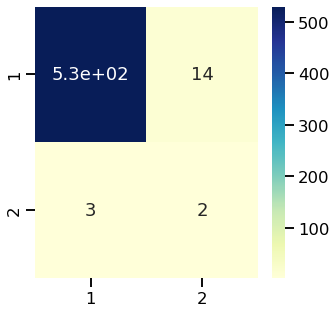

In [127]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()

#### MODELO KNN

Pruebo a ver su consigo mejor accuracy.

Se estimó el hiperparámetro manualmente, evaluando cómo influía en la accuracy.

In [128]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.994535519125683


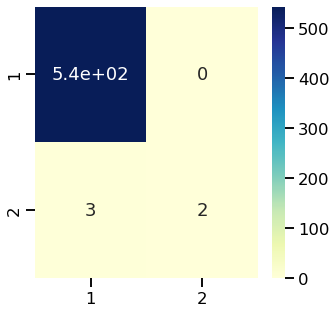

In [129]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()

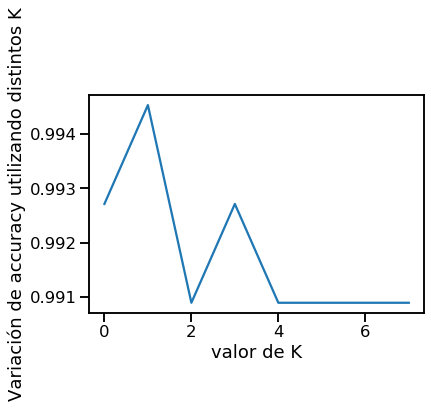

In [130]:
iteraciones_knn = 8
acc_knn = np.zeros(iteraciones_knn)
for r in range(0,iteraciones_knn):
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(x_train,y_train)
    y_pred_knn = neigh.predict(x_test)
    acc_knn[r] = accuracy_score(y_test, y_pred_knn)
    
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K")
plt.show()